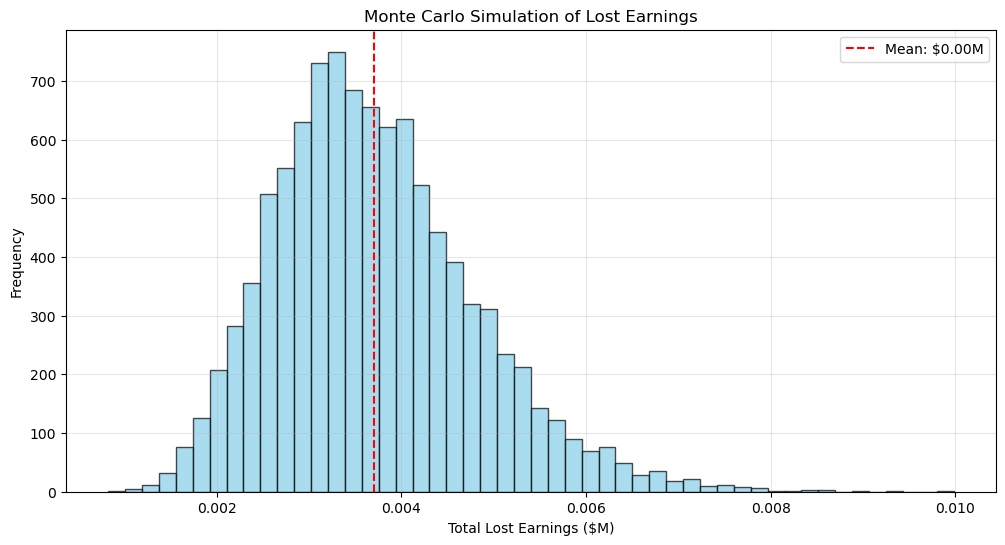

Mean Lost Earnings: $0.00M
Standard Deviation of Lost Earnings: $0.00M


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Monte Carlo parameters
num_simulations = 10000  # Number of simulations
years = 4  # Duration of the JV in years
aum_growth_mean = 1.5  # Mean annual growth factor for AUM (e.g., 1.5 = 50% growth)
aum_growth_std = 0.2   # Standard deviation of annual growth
initial_aum = 0.05     # Initial AUM in billions ($50 million)
return_mean = 0.026    # Mean annual return (2.6%)
return_std = 0.01      # Standard deviation of annual return
fee_rate = 0.5         # Fee percentage (50%)
discount_rate_mean = 0.1777  # Mean discount rate
discount_rate_std = 0.02     # Standard deviation of discount rate
continuation_probability = 0.75  # Probability of JV continuation

# Monte Carlo simulation
np.random.seed(42)
total_lost_earnings = []

for _ in range(num_simulations):
    # Simulate AUM growth over 4 years
    aum = [initial_aum]
    for year in range(years):
        growth = np.random.normal(aum_growth_mean, aum_growth_std)
        aum.append(aum[-1] * growth)
    aum = np.array(aum[1:])  # Remove initial value

    # Simulate returns for each year
    annual_returns = np.random.normal(return_mean, return_std, years)
    annual_fees = aum * annual_returns * fee_rate

    # Calculate discounted earnings
    discount_rate = np.random.normal(discount_rate_mean, discount_rate_std)
    discount_factors = 1 / (1 + discount_rate) ** np.arange(1, years + 1)
    discounted_earnings = np.sum(annual_fees * discount_factors)

    # Apply continuation probability
    final_earnings = discounted_earnings * continuation_probability
    total_lost_earnings.append(final_earnings)

# Visualize results
plt.figure(figsize=(12, 6))
plt.hist(total_lost_earnings, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(np.mean(total_lost_earnings), color='red', linestyle='--', label=f"Mean: ${np.mean(total_lost_earnings):.2f}M")
plt.title("Monte Carlo Simulation of Lost Earnings")
plt.xlabel("Total Lost Earnings ($M)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Summary statistics
mean_lost_earnings = np.mean(total_lost_earnings)
std_lost_earnings = np.std(total_lost_earnings)
print(f"Mean Lost Earnings: ${mean_lost_earnings:.2f}M")
print(f"Standard Deviation of Lost Earnings: ${std_lost_earnings:.2f}M")


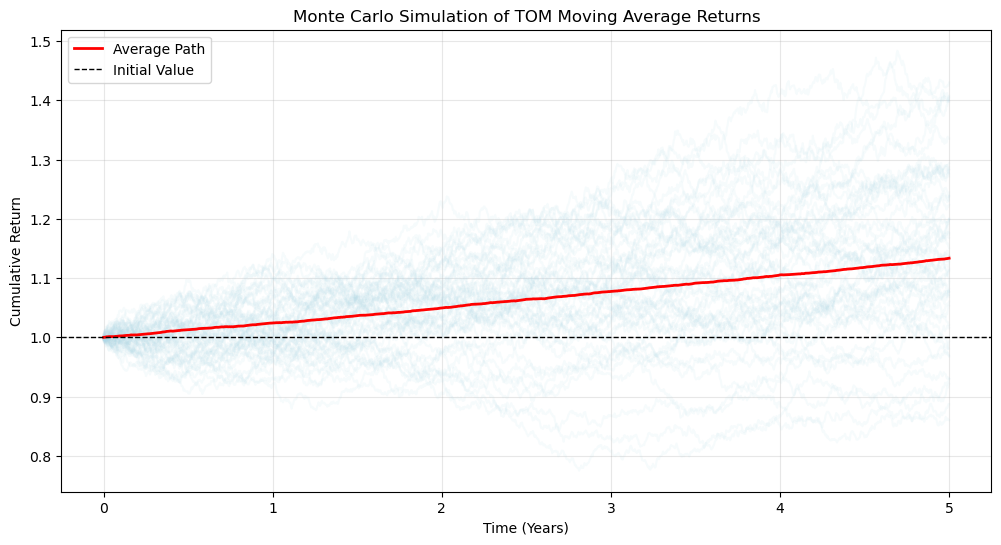

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters from the document
annual_mean_return = 0.0263  # Annualized mean return (2.63%)
annual_volatility = 0.0545  # Annualized volatility (5.45%)
trading_days = 252  # Trading days in a year
simulation_years = 5  # Simulate over 5 years
num_simulations = 1000  # Number of Monte Carlo iterations

# Convert annual stats to daily
daily_mean_return = annual_mean_return / trading_days
daily_volatility = annual_volatility / np.sqrt(trading_days)

# Generate Monte Carlo simulations
np.random.seed(42)  # For reproducibility
simulated_paths = []

for _ in range(num_simulations):
    daily_returns = np.random.normal(daily_mean_return, daily_volatility, trading_days * simulation_years)
    cumulative_returns = np.cumprod(1 + daily_returns)  # Cumulative product for returns
    simulated_paths.append(cumulative_returns)

# Convert to array for easier processing
simulated_paths = np.array(simulated_paths)

# Plotting
plt.figure(figsize=(12, 6))
time_points = np.linspace(0, simulation_years, trading_days * simulation_years)

# Plot a few paths for illustration
for path in simulated_paths[:50]:  # Plot first 50 paths
    plt.plot(time_points, path, color='lightblue', alpha=0.1)

# Plot the average path
average_path = simulated_paths.mean(axis=0)
plt.plot(time_points, average_path, color='red', label='Average Path', linewidth=2)

# Customize plot
plt.title('Monte Carlo Simulation of TOM Moving Average Returns')
plt.xlabel('Time (Years)')
plt.ylabel('Cumulative Return')
plt.axhline(1, color='black', linestyle='--', linewidth=1, label='Initial Value')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


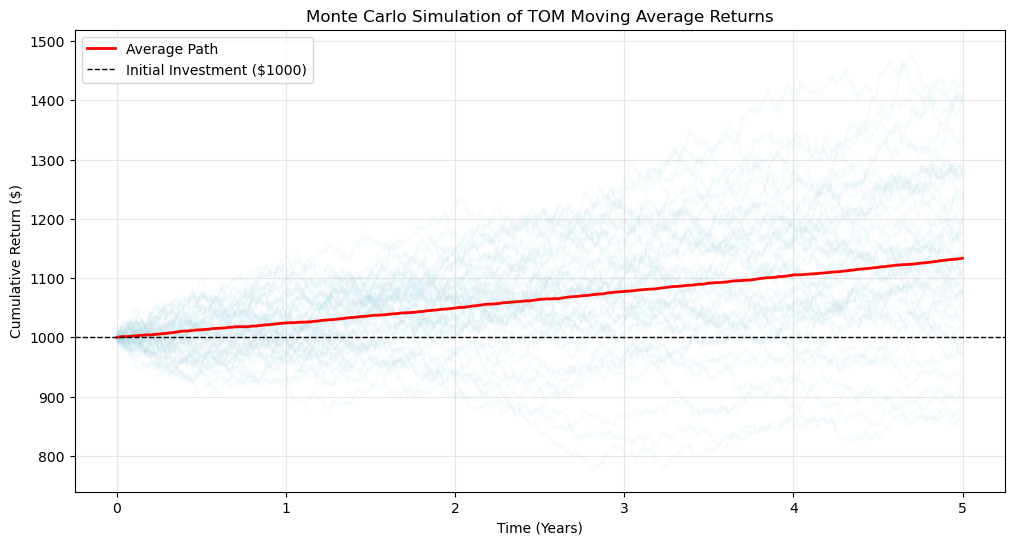

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters from the document
initial_investment = 1000  # Starting value in dollars
annual_mean_return = 0.0263  # Annualized mean return (2.63%)
annual_volatility = 0.0545  # Annualized volatility (5.45%)
trading_days = 252  # Trading days in a year
simulation_years = 5  # Simulate over 5 years
num_simulations = 1000  # Number of Monte Carlo iterations

# Convert annual stats to daily
daily_mean_return = annual_mean_return / trading_days
daily_volatility = annual_volatility / np.sqrt(trading_days)

# Generate Monte Carlo simulations
np.random.seed(42)  # For reproducibility
simulated_paths = []

for _ in range(num_simulations):
    daily_returns = np.random.normal(daily_mean_return, daily_volatility, trading_days * simulation_years)
    cumulative_returns = np.cumprod(1 + daily_returns) * initial_investment  # Adjusted for initial investment
    simulated_paths.append(cumulative_returns)

# Convert to array for easier processing
simulated_paths = np.array(simulated_paths)

# Plotting
plt.figure(figsize=(12, 6))
time_points = np.linspace(0, simulation_years, trading_days * simulation_years)

# Plot a few paths for illustration
for path in simulated_paths[:50]:  # Plot first 50 paths
    plt.plot(time_points, path, color='lightblue', alpha=0.1)

# Plot the average path
average_path = simulated_paths.mean(axis=0)
plt.plot(time_points, average_path, color='red', label='Average Path', linewidth=2)

# Customize plot
plt.title('Monte Carlo Simulation of TOM Moving Average Returns')
plt.xlabel('Time (Years)')
plt.ylabel('Cumulative Return ($)')
plt.axhline(initial_investment, color='black', linestyle='--', linewidth=1, label='Initial Investment ($1000)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


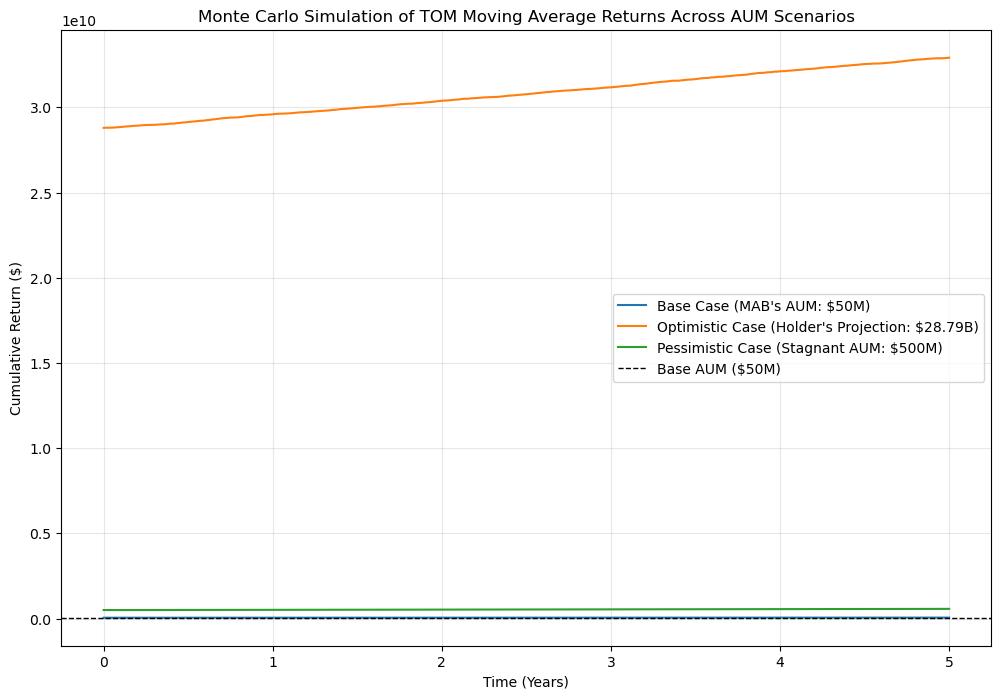

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
annual_mean_return = 0.0263  # Annualized mean return (2.63%)
annual_volatility = 0.0545  # Annualized volatility (5.45%)
trading_days = 252  # Trading days in a year
simulation_years = 5  # Simulate over 5 years
num_simulations = 1000  # Number of Monte Carlo iterations

# Scenarios
scenarios = {
    "Base Case (MAB's AUM: $50M)": 50_000_000,  # MAB AUM
    "Optimistic Case (Holder's Projection: $28.79B)": 28_790_000_000,  # Holder's projection
    "Pessimistic Case (Stagnant AUM: $500M)": 500_000_000  # Assumed stagnation
}

# Convert annual stats to daily
daily_mean_return = annual_mean_return / trading_days
daily_volatility = annual_volatility / np.sqrt(trading_days)

# Monte Carlo simulation
np.random.seed(42)  # For reproducibility

# Plotting setup
plt.figure(figsize=(12, 8))
time_points = np.linspace(0, simulation_years, trading_days * simulation_years)

for scenario, aum in scenarios.items():
    simulated_paths = []

    for _ in range(num_simulations):
        daily_returns = np.random.normal(daily_mean_return, daily_volatility, trading_days * simulation_years)
        cumulative_returns = np.cumprod(1 + daily_returns) * aum  # Adjusted for AUM
        simulated_paths.append(cumulative_returns)

    # Convert to array and calculate average
    simulated_paths = np.array(simulated_paths)
    average_path = simulated_paths.mean(axis=0)

    # Plot average path
    plt.plot(time_points, average_path, label=f"{scenario}")

# Customize plot
plt.title('Monte Carlo Simulation of TOM Moving Average Returns Across AUM Scenarios')
plt.xlabel('Time (Years)')
plt.ylabel('Cumulative Return ($)')
plt.axhline(50_000_000, color='black', linestyle='--', linewidth=1, label='Base AUM ($50M)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


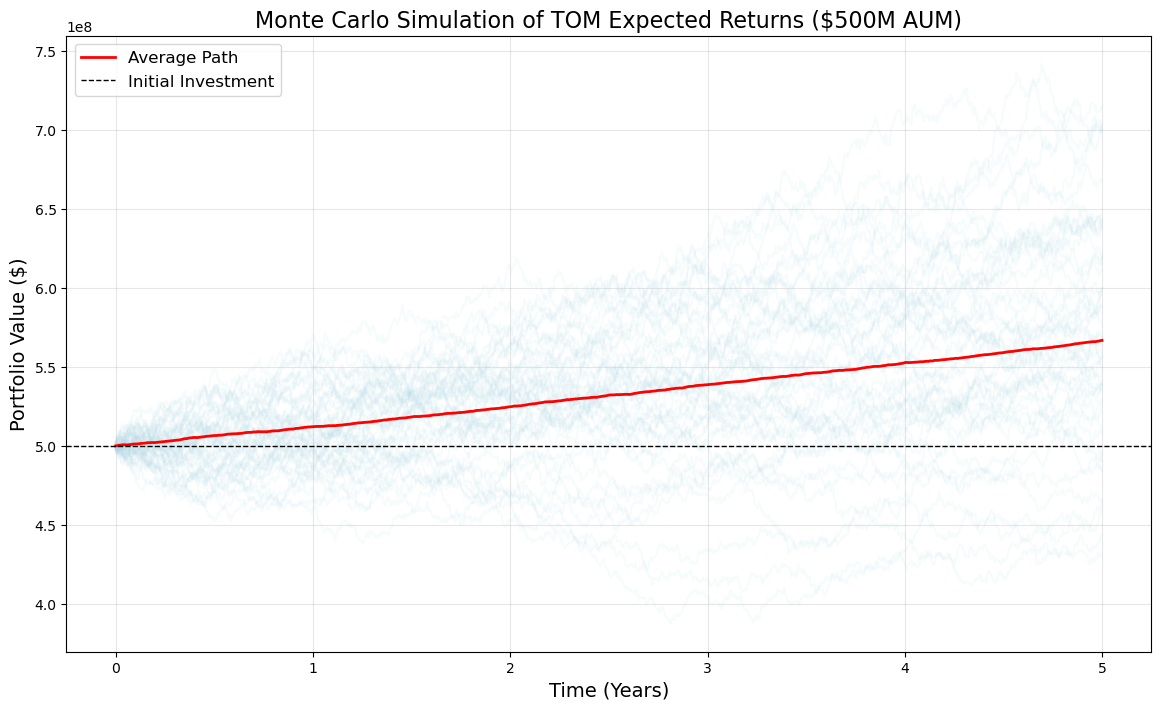

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters from the case
annual_return = 0.0263  # Annual expected return (2.63%)
annual_volatility = 0.0545  # Annual volatility (5.45%)
trading_days = 252  # Trading days in a year
years = 5  # Time horizon
num_simulations = 1000  # Number of Monte Carlo simulations
initial_investment = 500_000_000  # $500M AUM projection

# Convert annual stats to daily
daily_return = annual_return / trading_days
daily_volatility = annual_volatility / np.sqrt(trading_days)

# Generate Monte Carlo simulations
np.random.seed(42)  # For reproducibility
simulated_paths = []

for _ in range(num_simulations):
    daily_returns = np.random.normal(daily_return, daily_volatility, trading_days * years)
    cumulative_returns = np.cumprod(1 + daily_returns) * initial_investment
    simulated_paths.append(cumulative_returns)

# Convert to numpy array for easier handling
simulated_paths = np.array(simulated_paths)

# Plot the simulations
plt.figure(figsize=(14, 8))
time_points = np.linspace(0, years, trading_days * years)

# Plot individual paths
for path in simulated_paths[:50]:  # Show 50 paths for clarity
    plt.plot(time_points, path, color='lightblue', alpha=0.1)

# Plot the average path
average_path = simulated_paths.mean(axis=0)
plt.plot(time_points, average_path, color='red', linewidth=2, label='Average Path')

# Add plot details
plt.title('Monte Carlo Simulation of TOM Expected Returns ($500M AUM)', fontsize=16)
plt.xlabel('Time (Years)', fontsize=14)
plt.ylabel('Portfolio Value ($)', fontsize=14)
plt.axhline(initial_investment, color='black', linestyle='--', linewidth=1, label='Initial Investment')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


In [2]:
import numpy as np

# Parameters from the case
annual_return = 0.0263  # Annual expected return (2.63%)
annual_volatility = 0.0545  # Annual volatility (5.45%)
trading_days = 252  # Trading days in a year
years = 5  # Time horizon
num_simulations = 1000  # Number of Monte Carlo simulations
initial_investment = 500_000_000  # $500M AUM projection
target_claim = 304_000_000  # Original claim in USD

# Convert annual stats to daily
daily_return = annual_return / trading_days
daily_volatility = annual_volatility / np.sqrt(trading_days)

# Generate Monte Carlo simulations
np.random.seed(42)  # For reproducibility
simulated_final_values = []

for _ in range(num_simulations):
    daily_returns = np.random.normal(daily_return, daily_volatility, trading_days * years)
    cumulative_returns = np.cumprod(1 + daily_returns) * initial_investment
    simulated_final_values.append(cumulative_returns[-1])  # Capture the final value

# Convert to numpy array for easier handling
simulated_final_values = np.array(simulated_final_values)

# Calculate metrics
mean_final_value = np.mean(simulated_final_values)
std_final_value = np.std(simulated_final_values)

# Calculate mean and SD of the compensation amount
compensation_amounts = simulated_final_values - initial_investment  # Unrealized profits
mean_compensation = np.mean(compensation_amounts)
std_compensation = np.std(compensation_amounts)

# Output results
print(f"Key Metrics for TOM's Compensation Claim:")
print(f"Original Claim Amount: ${target_claim:,.2f}")
print(f"Mean Compensation (Based on Simulations): ${mean_compensation:,.2f}")
print(f"Standard Deviation of Compensation: ${std_compensation:,.2f}")
print(f"Probability of Exceeding Claim ($304M): {np.mean(compensation_amounts >= target_claim) * 100:.2f}%")


Key Metrics for TOM's Compensation Claim:
Original Claim Amount: $304,000,000.00
Mean Compensation (Based on Simulations): $66,779,565.47
Standard Deviation of Compensation: $69,915,702.27
Probability of Exceeding Claim ($304M): 0.00%
